# Neural Network Approximation using ReLU  
### Scientific Computing Practical - Part II  
**Student:** Luqman Ahmed  
**Function to Approximate:** \( f(x) = \sin(2\pi x) \)

## Step 1: Plot the Target Function
We want to approximate the function \( \sin(2\pi x) \) using a neural network.
This plot shows what the true function looks like.

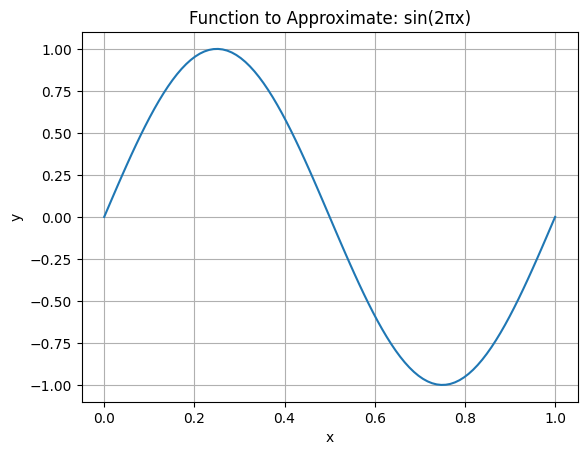

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x)

plt.plot(x, y)
plt.title("Function to Approximate: sin(2πx)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Step 2: Define ReLU Activation and Loss Function
We use ReLU as activation and Mean Squared Error (MSE) as loss function.

In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## Step 3: Prepare Input Data and Initialize Weights
We use 1 hidden layer with 10 neurons.

In [3]:
x = np.linspace(0, 1, 100).reshape(-1, 1)
y_true = np.sin(2 * np.pi * x)

np.random.seed(0)

W1 = np.random.randn(1, 10)
b1 = np.zeros((1, 10))
W2 = np.random.randn(10, 1)
b2 = np.zeros((1, 1))

## Step 4: Train the Neural Network
We do a manual forward and backward pass to update weights.

In [4]:
lr = 0.01
epochs = 5000
loss_history = []

for epoch in range(epochs):
    z1 = x @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_pred = z2

    loss = mse_loss(y_true, y_pred)
    loss_history.append(loss)

    dloss = 2 * (y_pred - y_true) / y_true.size
    dW2 = a1.T @ dloss
    db2 = np.sum(dloss, axis=0, keepdims=True)

    da1 = dloss @ W2.T
    dz1 = da1 * relu_derivative(z1)
    dW1 = x.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

Epoch 0, Loss: 6.391216
Epoch 1000, Loss: 0.114993
Epoch 2000, Loss: 0.089326
Epoch 3000, Loss: 0.067522
Epoch 4000, Loss: 0.049193


## Step 5: Plot the Neural Network Approximation
The orange line shows the learned approximation from our NN.

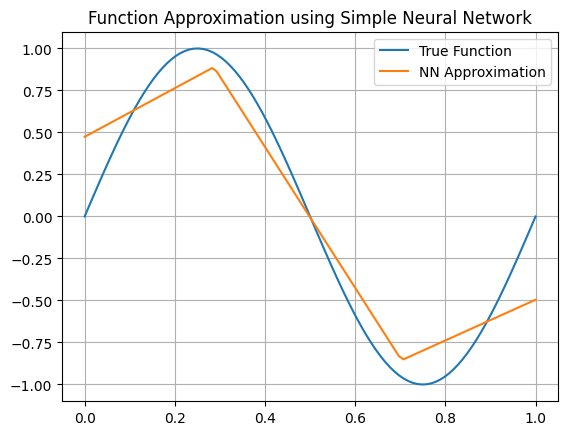

In [5]:
plt.plot(x, y_true, label='True Function')
plt.plot(x, y_pred, label='NN Approximation')
plt.legend()
plt.title("Function Approximation using Simple Neural Network")
plt.grid(True)
plt.show()

In [2]:
print(" Notebook running fine now!")

 Notebook running fine now!
